# Task - 6 : Prediction using Decision Tree Algorithm

In [1]:
#Importing initial necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Loading Data
iris = pd.read_csv('Iris.csv', index_col='Id')

In [3]:
iris.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
6,5.4,3.9,1.7,0.4,Iris-setosa
7,4.6,3.4,1.4,0.3,Iris-setosa
8,5.0,3.4,1.5,0.2,Iris-setosa
9,4.4,2.9,1.4,0.2,Iris-setosa


### Splitting the Dataset as X and y and further Train and Test

In [4]:
X = iris.drop('Species', axis=1)
y = iris.loc[:,'Species']

In [5]:
y = y.map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})

In [6]:
y.unique()

array([0, 1, 2], dtype=int64)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [9]:
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


### Training the Model and Predicting the Test data

In [10]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [11]:
dtree = DecisionTreeClassifier()

In [12]:
dtree.fit(X_train,y_train)
predict = dtree.predict(X_test)

In [13]:
predict

array([0, 0, 0, 1, 1, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2, 1, 1, 1, 0, 2, 1, 0,
       1, 1, 1, 1, 1, 2, 0, 0], dtype=int64)

In [14]:
from sklearn.metrics import confusion_matrix,classification_report

#### Performance of our Model

In [15]:
print(confusion_matrix(y_test,predict))
print('\n')
print(classification_report(y_test,predict))

[[10  0  0]
 [ 0 12  0]
 [ 0  1  7]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.92      1.00      0.96        12
           2       1.00      0.88      0.93         8

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



### Visualizing the Decision Tree Model

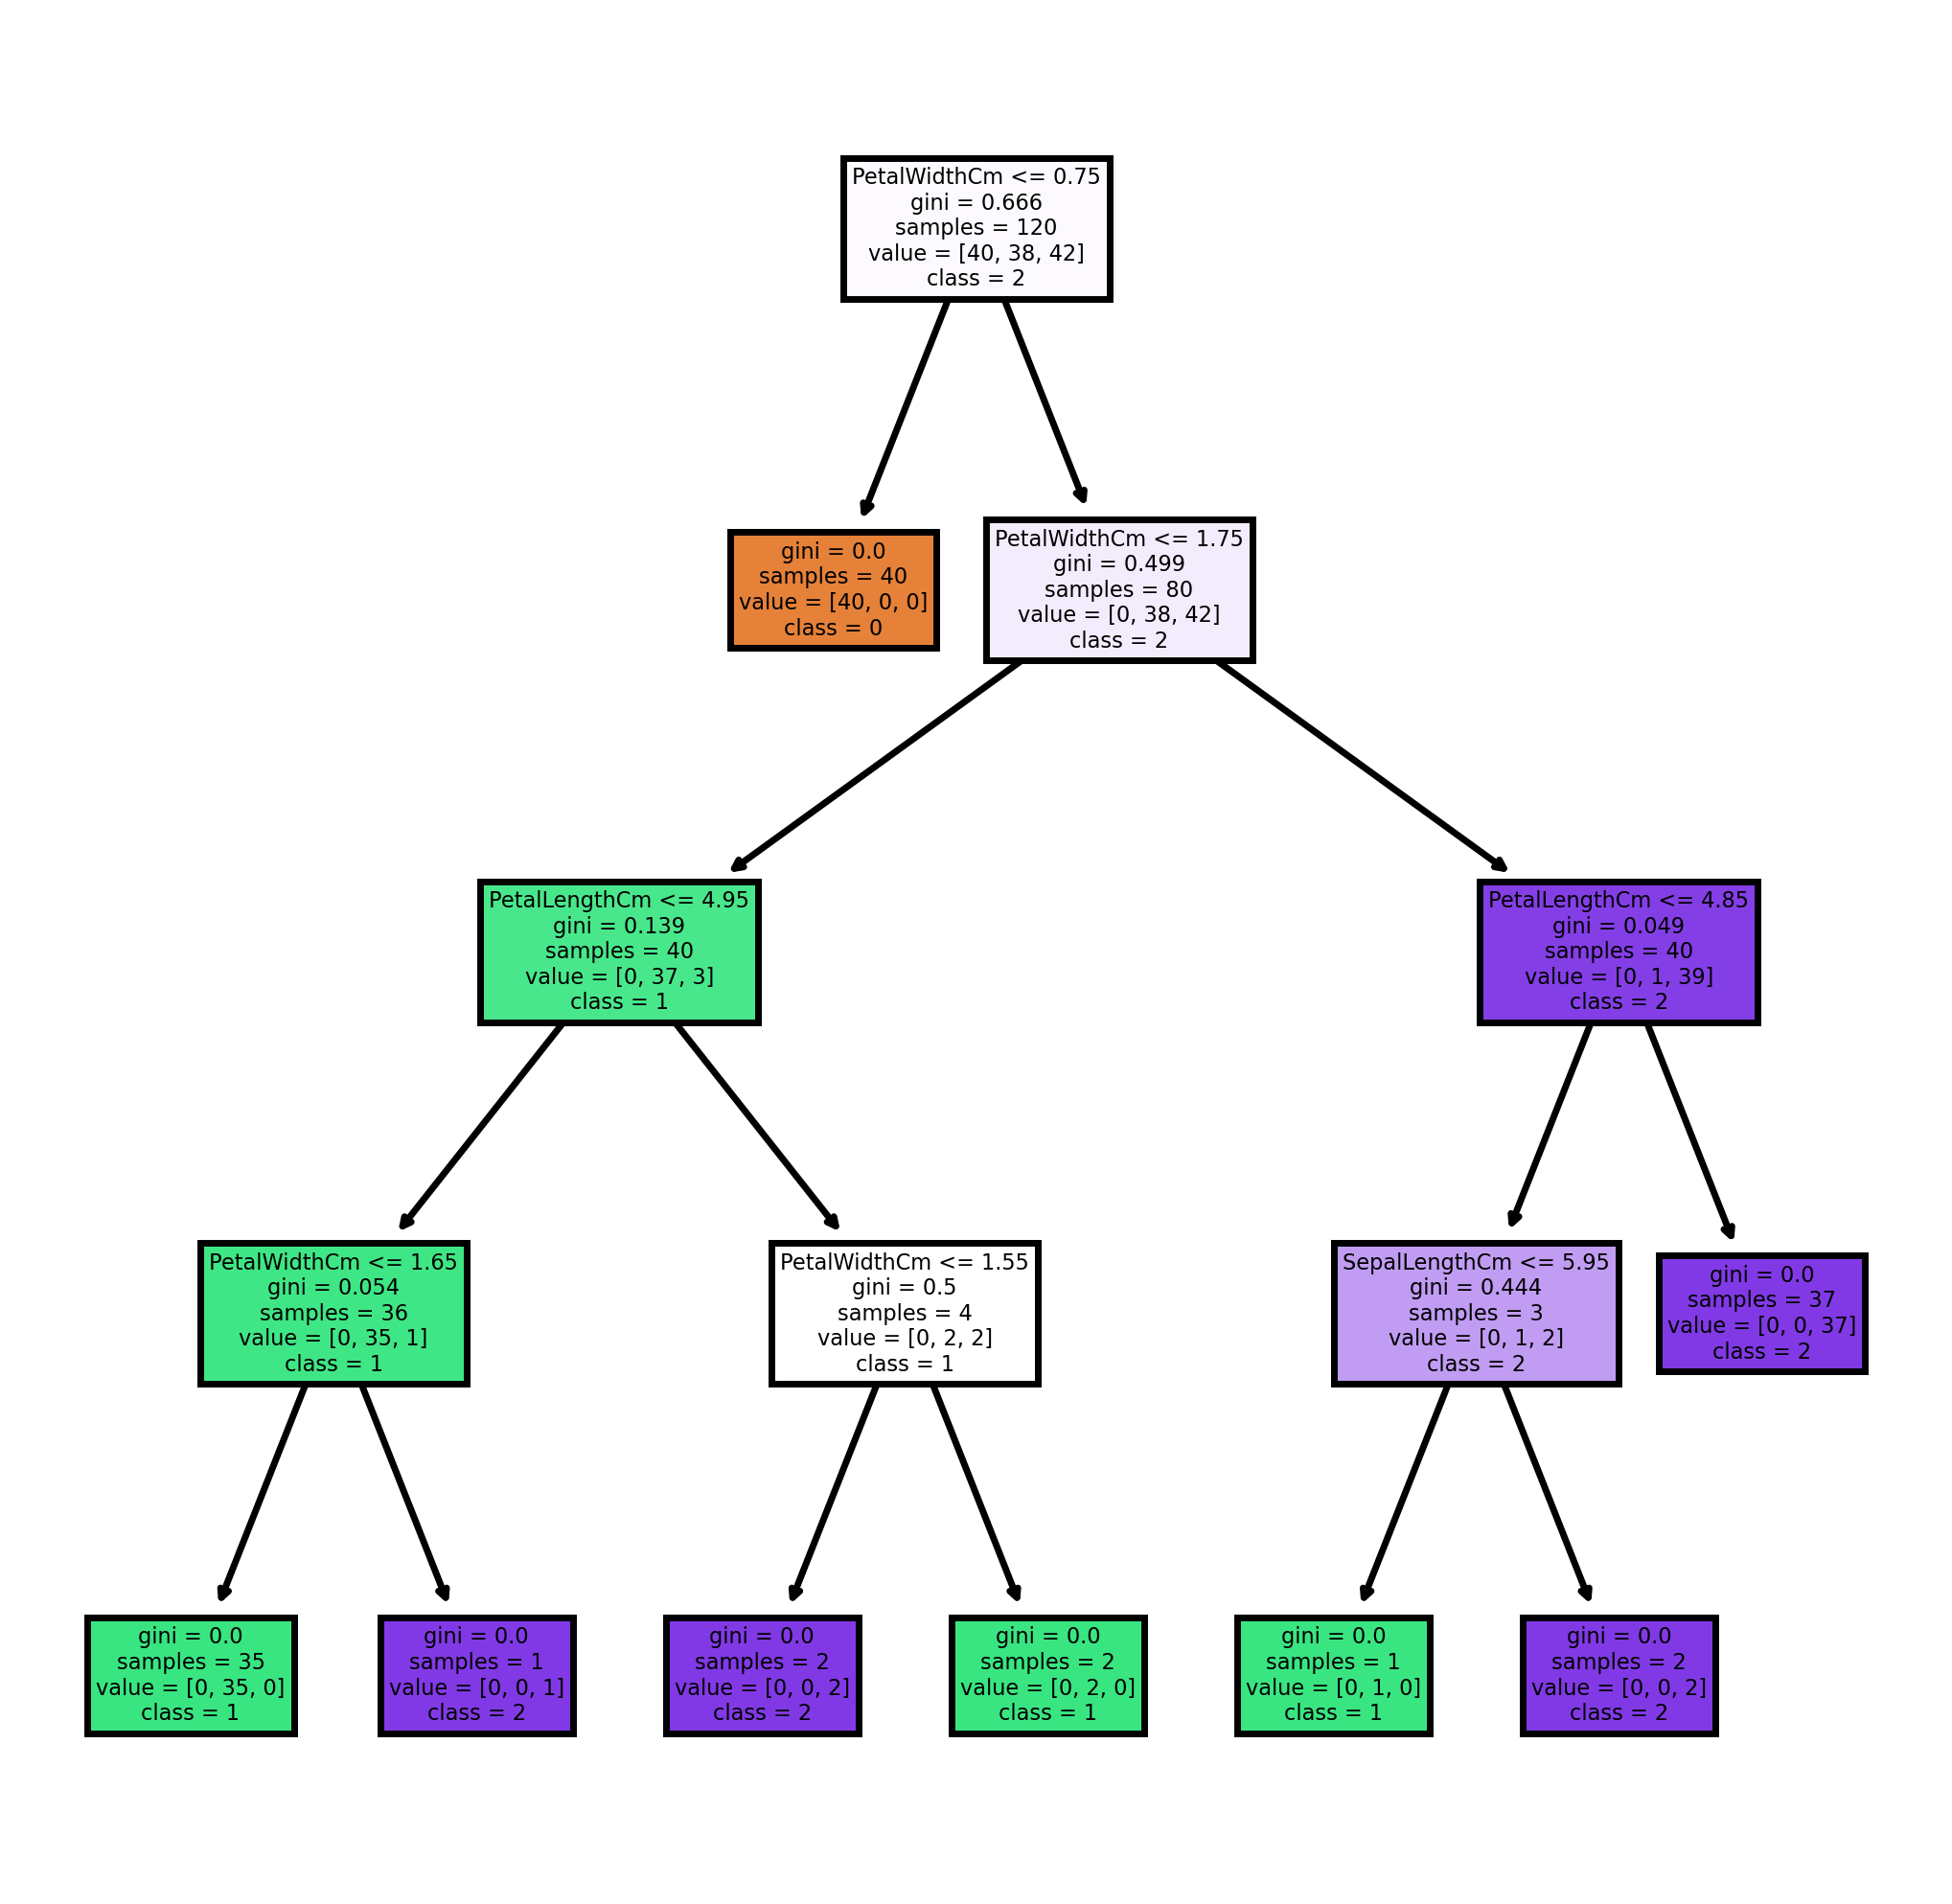

In [16]:
fn=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
cn=['0', '1', '2']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=500)
tree.plot_tree(dtree,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('Decisiontree.png')

## Result
Using Decision-Tree we have trained the model with 97% Accuracy